## NAME - AYUSHI SACHAN
## PRN - 1032211768
## BATCH - A1

## **EXPERIMENT - 4 Image registration with optimization technique.**

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
refer = cv2.imread('/content/cpu2.jpg')
original = cv2.imread('/content/cpu1.jpg')

In [ ]:
img1 = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(refer, cv2.COLOR_BGR2GRAY)

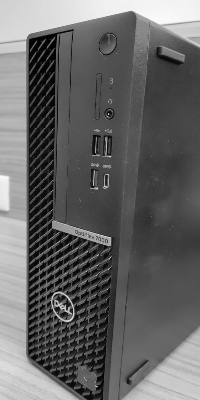

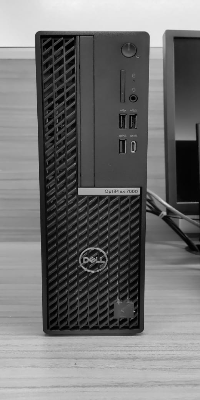

In [ ]:
img1 = cv2.resize(img1,(200,400),interpolation=cv2.INTER_LINEAR)
img2 = cv2.resize(img2,(200,400),interpolation=cv2.INTER_LINEAR)
cv2_imshow(img1)
print('\n')
cv2_imshow(img2)

In [ ]:
sift = cv2.SIFT_create()

# Find keypoints and descriptors using SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Create BFMatcher object
bf = cv2.BFMatcher()

# Match descriptors
matches = bf.knnMatch(des1, des2, k=2)

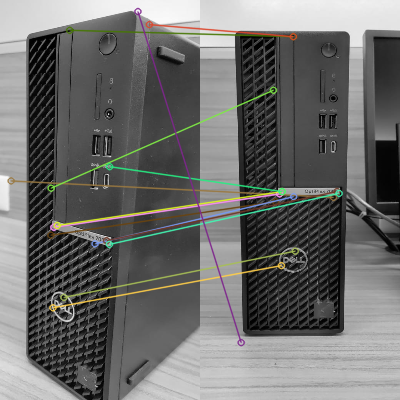

In [ ]:
# Apply ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Draw matches
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matches
cv2_imshow( img_matches)
cv2.waitKey(0)
cv2.destroyAllWindows()


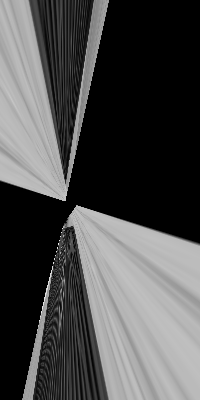

In [ ]:
# Convert keypoints to an array
src_pts = []
dst_pts = []

for m in good_matches:
    query_idx = m.queryIdx
    train_idx = m.trainIdx
    if query_idx < len(kp2) and train_idx < len(kp1):
        src_pts.append(kp2[query_idx].pt)
        dst_pts.append(kp1[train_idx].pt)

src_pts = np.float32(src_pts).reshape(-1, 1, 2)
dst_pts = np.float32(dst_pts).reshape(-1, 1, 2)


# Find Homography matrix using RANSAC
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# Apply perspective transformation to the reference image
height, width = img2.shape
#transformed_img = cv2.warpPerspective(refer, M, (width, height))
transformed_img = cv2.warpPerspective(img2, M, (img1.shape[1], img1.shape[0]))
# Display the transformed image
cv2_imshow(transformed_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
